In [330]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


### 1. Loading and Preparing Data for Analysis

In [331]:
data = pd.read_csv("../data/rfm.csv")

# Vérifier les types de données
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     5899 non-null   float64
 1   recency         5899 non-null   int64  
 2   frequency       5899 non-null   int64  
 3   monetary        5899 non-null   float64
 4   pourcentage     5898 non-null   float64
 5   basket_average  5899 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 276.6 KB
None


### 2. Exploring Data Types and Converters

In [332]:
# Statistical summary of the RFM
data.describe()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
count,5899.000000,5899.000000,5899.000000,5899.000000,5898.000000,5.899000e+03
mean,15316.746737,201.646042,6.234955,2795.096680,inf,-inf
std,1716.135886,210.914567,12.815370,13823.791103,NaN,NaN
min,12346.000000,1.000000,0.000000,-1343.240000,0.000000,-inf
25%,13831.500000,25.000000,1.000000,327.800000,0.000000,1.705230e+02
50%,15319.000000,95.000000,3.000000,837.260000,0.000000,2.709400e+02
75%,16800.500000,380.000000,7.000000,2164.385000,1.541748,4.040507e+02
max,18287.000000,739.000000,379.000000,578408.640000,inf,1.320650e+04


### 3. Visualizing Frequency and Monetary Relationship

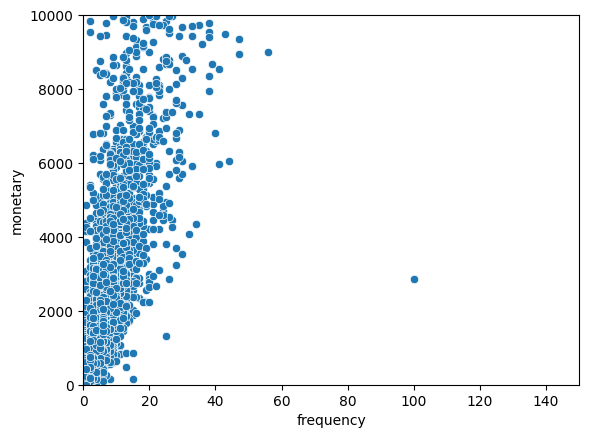

In [333]:
sns.scatterplot(x=data['frequency'], y=data['monetary'])
plt.xlim([0,150])
plt.ylim([0,10000])
plt.show()

### 4. Boxplots for each

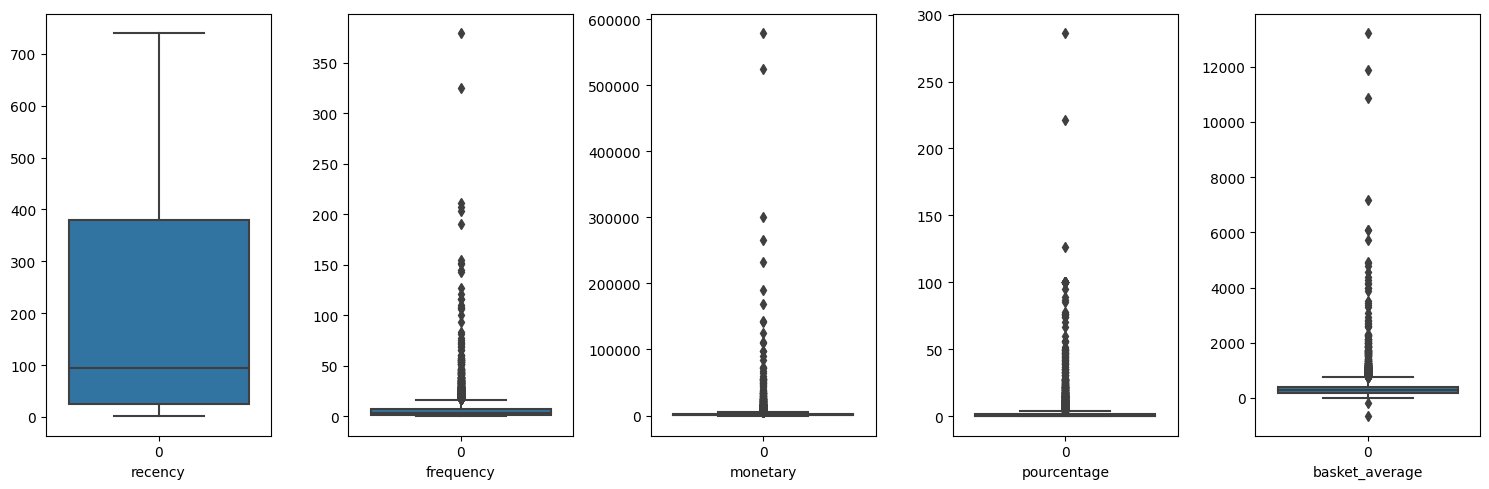

In [334]:
c = ['recency', 'frequency', 'monetary' , 'pourcentage' , 'basket_average']

# Créer une sous-figure avec plusieurs axes pour les boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(c), figsize=(15, 5))

# Parcourir les variables et tracer les boxplots correspondants
for i, var in enumerate(c):
    sns.boxplot(data=data[var], ax=axes[i])
    axes[i].set_xlabel(var)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les boxplots
plt.show()



### 5. 3D Scatterplot of Recency, Frequency, and Monetary

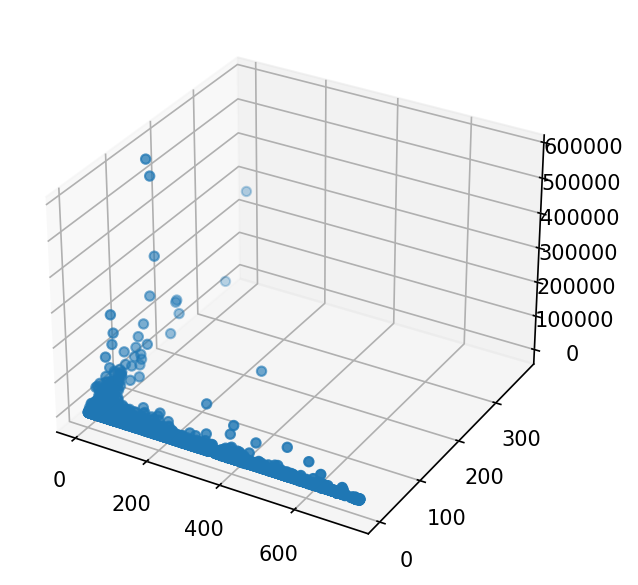

In [335]:
plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(data.recency, data.frequency, data.monetary)
# ax.view_init(30,30)

### 6. Removing Outliers using Quantile method

In [336]:
# Définir le seuil de suppression des valeurs extrêmes (par exemple, 0.95 pour garder les 95% des observations)
quantile_threshold = 0.95

# Calculer les quantiles pour chaque variable
quantiles = data.quantile(quantile_threshold)

# Appliquer la suppression des valeurs extrêmes pour chaque variable
filtered_data = data[(data <= quantiles).all(axis=1)]

# Afficher les statistiques résumées de l'ensemble de données filtré
filtered_data.describe()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
count,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000
mean,15209.645403,181.860757,4.503740,1381.638423,1.009775,291.537999
std,1617.424216,182.902735,4.096268,1551.283066,2.041371,159.996013
min,12347.000000,1.000000,1.000000,3.750000,0.000000,3.750000
25%,13812.250000,27.000000,1.000000,340.842500,0.000000,170.739500
50%,15221.000000,90.000000,3.000000,788.635000,0.000000,262.309286
75%,16617.750000,359.000000,6.000000,1794.225000,1.078089,376.196750
max,17991.000000,628.000000,21.000000,8859.820000,11.394443,841.340000


In [337]:
filtered_data = filtered_data.reset_index(drop=True)
filtered_data.head()

,customer_id,recency,frequency,monetary,pourcentage,basket_average
0,12347.0,3,8,4921.53,0.000000,615.191250
1,12348.0,76,5,2019.40,0.000000,403.880000
2,12350.0,311,1,334.40,0.000000,334.400000
3,12351.0,376,1,300.93,0.000000,300.930000
4,12352.0,37,9,1889.21,5.987938,209.912222


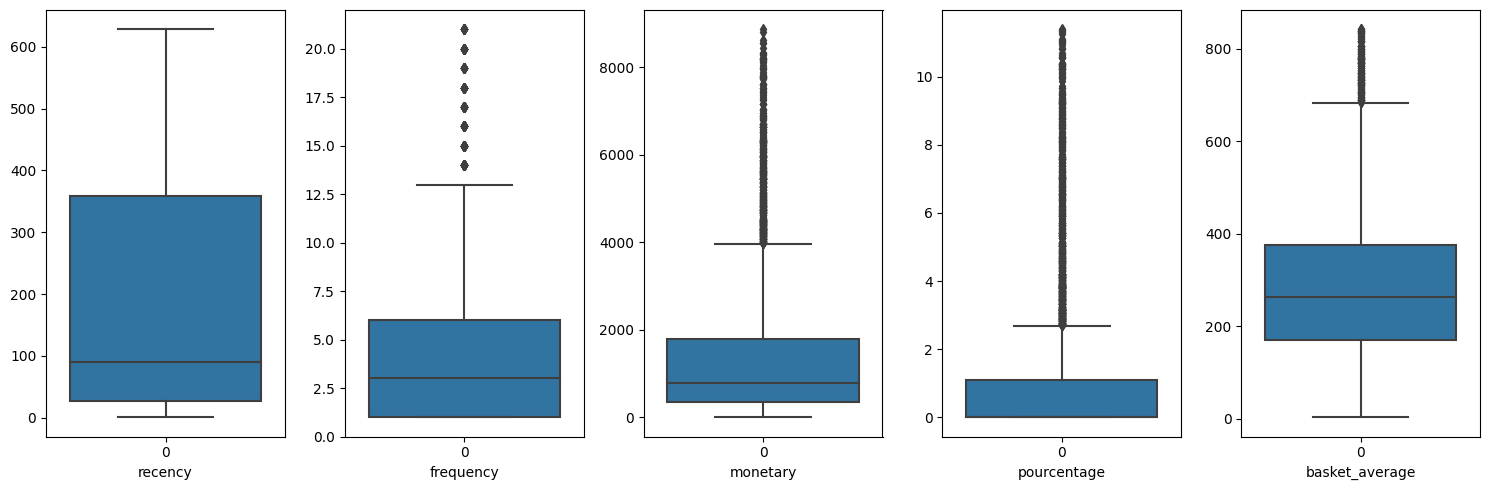

In [338]:
# Spécifiez les colonnes pour les boxplots
c = ['recency', 'frequency', 'monetary', 'pourcentage', 'basket_average']

# Créez une figure avec plusieurs sous-graphiques pour les boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(c), figsize=(15, 5))

# Parcourez les variables et tracez les boxplots correspondants
for i, var in enumerate(c):
    sns.boxplot(data=filtered_data[var], ax=axes[i])
    axes[i].set_xlabel(var)

# Ajustez l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichez les boxplots
plt.show()

### 7. Scaling the Data

In [339]:
from sklearn.preprocessing import StandardScaler, RobustScaler
c = ['recency', 'frequency', 'monetary' , 'pourcentage' , 'basket_average']

rfms = RobustScaler().fit(filtered_data[c]).transform(filtered_data[c])
# rfms = StandardScaler().fit(rfm[c]).transform(rfm[c])

rfms = pd.DataFrame(rfms, columns=c)
rfms

,recency,frequency,monetary,pourcentage,basket_average
0,-0.262048,1.0,2.843639,0.000000,1.717544
1,-0.042169,0.4,0.846828,0.000000,0.689052
2,0.665663,-0.4,-0.312536,0.000000,0.350879
3,0.861446,-0.4,-0.335565,0.000000,0.187974
4,-0.159639,1.2,0.757251,5.554213,-0.255027
...,...,...,...,...,...
4541,0.289157,0.4,0.069689,7.255744,-0.410427
4542,-0.234940,2.0,-0.215287,1.900243,-1.098593
4543,0.873494,-0.4,-0.399967,0.000000,-0.267595
4544,0.442771,0.6,0.504984,0.306030,-0.041603


### 8. Clustering with KMeans

In [340]:
kp = pd.Series(KMeans(n_clusters = 4, random_state=10, max_iter=3000).fit(rfms[c]).predict(rfms[c]))
rfms['Cluster'] = kp

/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    Averages of Clusters

In [341]:
cluster_points = rfms.groupby('Cluster').mean().reset_index()
cluster_points

,Cluster,recency,frequency,monetary,pourcentage,basket_average
0,0,0.380412,-0.042375,-0.058452,0.097049,-0.006492
1,1,0.193554,0.400000,0.418039,3.059209,0.228676
2,2,-0.102876,1.602717,2.332477,0.844853,0.739097
3,3,0.310254,0.454867,0.410208,7.537819,0.000886


    Number of customers per Cluster

In [342]:
rfms.Cluster.value_counts()

0    3049
2     736
1     535
3     226
Name: Cluster, dtype: int64

    Drop Cluster column from dataframe to prepare for radar plot

In [343]:
cluster_points_nocluster=cluster_points.drop('Cluster', axis=1)
# df_cluster_points_nocluster = pd.DataFrame(cluster_points_nocluster, columns=cluster_points_nocluster.columns[0:])

print(cluster_points_nocluster.columns)
print(len(cluster_points_nocluster))
cluster_points_nocluster


Index(['recency', 'frequency', 'monetary', 'pourcentage', 'basket_average'], dtype='object')
4


,recency,frequency,monetary,pourcentage,basket_average
0,0.380412,-0.042375,-0.058452,0.097049,-0.006492
1,0.193554,0.400000,0.418039,3.059209,0.228676
2,-0.102876,1.602717,2.332477,0.844853,0.739097
3,0.310254,0.454867,0.410208,7.537819,0.000886


    Radar plot to show the average variables values for Clusters

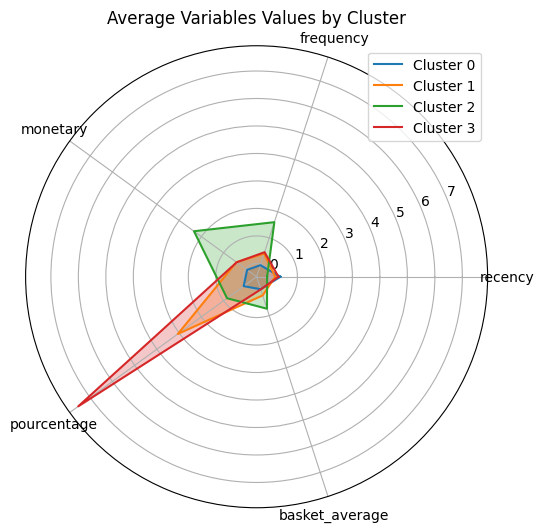

In [344]:
num_vars = len(cluster_points_nocluster.columns)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, row in cluster_points_nocluster.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]

    ax.plot(angles, values, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(cluster_points_nocluster.columns)
ax.set_title('Average Variables Values by Cluster')
ax.legend(loc='upper right')

plt.show()


    Defining types of customers

- Cluster 0: Value Seekers
This cluster represents customers who have moderate recency, low frequency, low monetary value, average percentage, and a slightly below-average basket average. They seek value in their purchases and are likely looking for discounts or lower-priced items.

- Cluster 1: Loyal customers
This cluster represents customers who have relatively low recency, moderate frequency, moderate monetary value, high percentage, and above-average basket average. These customers are loyal and engaged. They make frequent purchases with moderate monetary value and higher basket averages. They are enthusiastic about your products or services and show consistent engagement with your brand.

- Cluster 2: High-Value Buyers
These customers are the most valuable in terms of their purchasing behavior. They make frequent purchases with high monetary value and significantly higher basket averages. They are likely to be your top spenders and have a strong affinity for your offerings.

- Cluster 3: Discount Shoppers
These customers have a high percentage of discounts or low-value items in their purchases, resulting in a very low basket average. They may be attracted to promotional offers or are looking for the best deals. They tend to make purchases at a moderate frequency but with lower monetary value.

### 8. ACP
    Determine the optimal number of principal components to retain based on the explained variance ratio

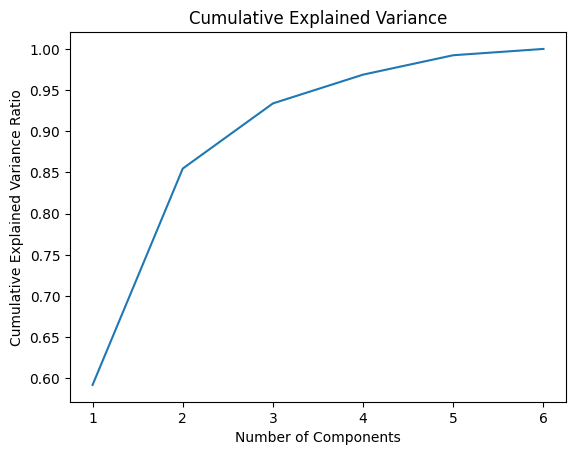

In [345]:
# Initialize and fit PCA
pca = PCA()
pca.fit(rfms)

# Calculate explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Create cumulative explained variance plot
cumulative_var_ratio = np.cumsum(explained_var_ratio)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.show()

In [346]:
rfms

,recency,frequency,monetary,pourcentage,basket_average,Cluster
0,-0.262048,1.0,2.843639,0.000000,1.717544,2
1,-0.042169,0.4,0.846828,0.000000,0.689052,0
2,0.665663,-0.4,-0.312536,0.000000,0.350879,0
3,0.861446,-0.4,-0.335565,0.000000,0.187974,0
4,-0.159639,1.2,0.757251,5.554213,-0.255027,3
...,...,...,...,...,...,...
4541,0.289157,0.4,0.069689,7.255744,-0.410427,3
4542,-0.234940,2.0,-0.215287,1.900243,-1.098593,1
4543,0.873494,-0.4,-0.399967,0.000000,-0.267595,0
4544,0.442771,0.6,0.504984,0.306030,-0.041603,0


In [347]:
pca=PCA(n_components=2)
pc=pca.fit_transform(rfms)

df_acp=pd.DataFrame(data=pc,columns=['principal_component_1','principal_component_2'])
df_acp.head()

,principal_component_1,principal_component_2
0,0.468586,3.235324
1,-0.891698,0.773498
2,-1.328001,-0.604369
3,-1.351848,-0.697286
4,5.207063,-0.595906


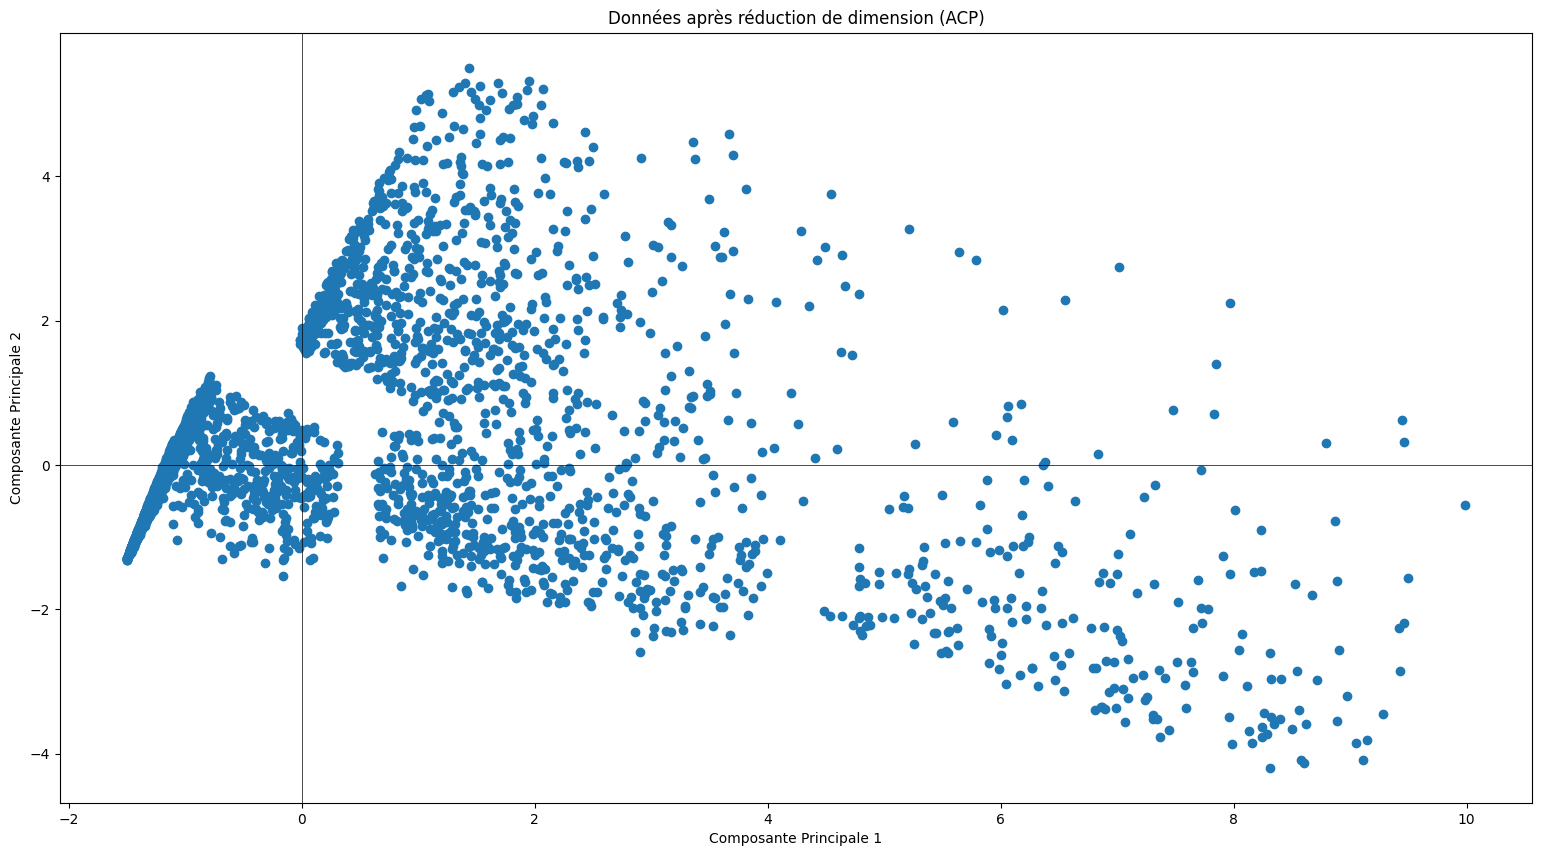

In [348]:
# Créer le graphe
pc1 = df_acp['principal_component_1']
pc2 = df_acp['principal_component_2']



plt.figure(figsize=(19, 10))
plt.scatter(pc1, pc2)
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')

# Ajouter les axes
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.title('Données après réduction de dimension (ACP)')
plt.show()

### 9. Clustering Using K-Means

    Evaluating K-Means Performance by Cluster Number

/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

Text(0.5, 1.0, 'KMeans Performance By Cluster Number')

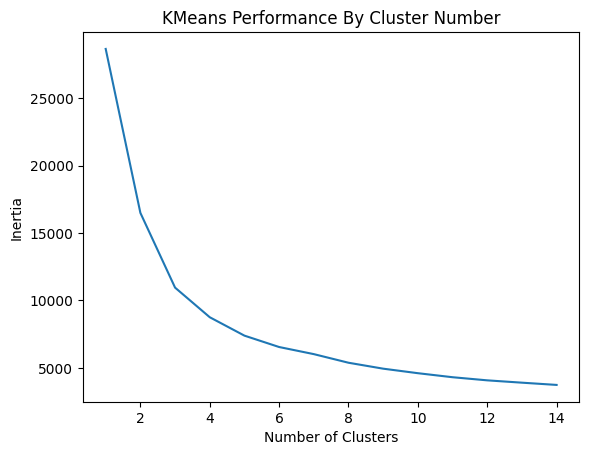

In [349]:
plt.figure(dpi=100)
inertias = []
for i in range(1,15):
    inertias.append(KMeans(n_clusters = i).fit(rfms[c]).inertia_)
plt.plot(range(1,15), inertias)
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.title('KMeans Performance By Cluster Number')

    Assigning Clusters to Customers

In [350]:
n = ['principal_component_1',	'principal_component_2']
kp = pd.Series(KMeans(n_clusters = 4, random_state=10, max_iter=3000).fit(df_acp[n]).predict(df_acp[n]))
df_acp['Cluster'] = kp

/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [351]:
df_acp.Cluster.value_counts()

1    3049
0     738
3     533
2     226
Name: Cluster, dtype: int64

In [352]:
df_acp.Cluster

0       0
1       1
2       1
3       1
4       2
       ..
4541    2
4542    3
4543    1
4544    1
4545    1
Name: Cluster, Length: 4546, dtype: int32

In [353]:
ax.set_xlim(-1.1, 1.1)


# Nombre de clusters souhaité
n_clusters = 4

# Instanciation de l'algorithme K-means
kmeans = KMeans(n_clusters=n_clusters)

# Apprentissage des clusters
kmeans.fit(df_acp)

# Assignation des clusters pour chaque point
labels = kmeans.labels_

# Coordonnées des centroides de chaque cluster
centroids = kmeans.cluster_centers_

# Affichage des résultats
for i in range(n_clusters):
    cluster_points = df_acp.iloc[labels == i]
    print(f"Cluster {i+1}:")
    print(cluster_points)



/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1:
      principal_component_1  principal_component_2  Cluster
1                 -0.891698               0.773498        1
2                 -1.328001              -0.604369        1
3                 -1.351848              -0.697286        1
5                 -1.306306              -0.602566        1
6                 -1.150131               0.013955        1
...                     ...                    ...      ...
4539              -1.157435               0.077817        1
4540              -1.428856              -1.049913        1
4543              -1.393285              -0.869574        1
4544              -0.727270               0.227320        1
4545              -1.321120              -0.713178        1

[3049 rows x 3 columns]
Cluster 2:
      principal_component_1  principal_component_2  Cluster
4                  5.207063              -0.595906        2
48                 5.234982              -1.635902        2
63                 8.558364              -3.397382   

    Visualizing Customer Clusters in 2D

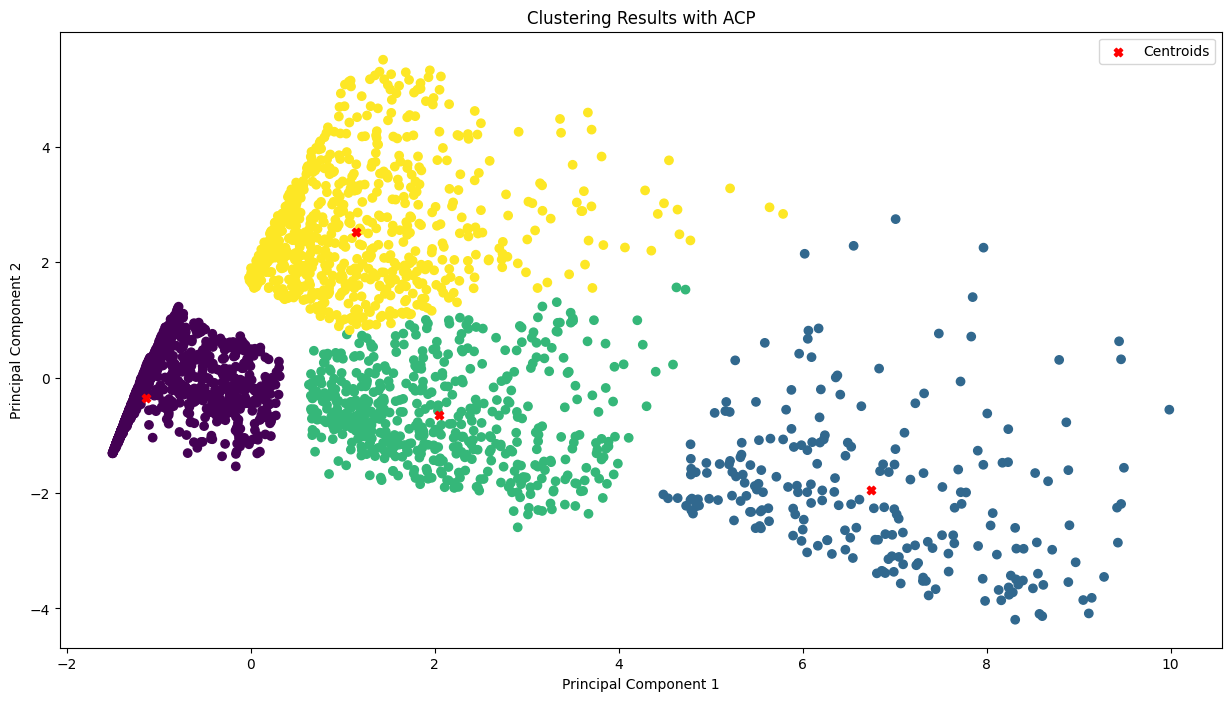

In [354]:
# Set the desired size of the figure
fig, ax = plt.subplots(figsize=(15, 8))

plt.scatter(df_acp.values[:, 0], df_acp.values[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results with ACP')


plt.legend()
plt.show()

In [355]:
rfms

,recency,frequency,monetary,pourcentage,basket_average,Cluster
0,-0.262048,1.0,2.843639,0.000000,1.717544,2
1,-0.042169,0.4,0.846828,0.000000,0.689052,0
2,0.665663,-0.4,-0.312536,0.000000,0.350879,0
3,0.861446,-0.4,-0.335565,0.000000,0.187974,0
4,-0.159639,1.2,0.757251,5.554213,-0.255027,3
...,...,...,...,...,...,...
4541,0.289157,0.4,0.069689,7.255744,-0.410427,3
4542,-0.234940,2.0,-0.215287,1.900243,-1.098593,1
4543,0.873494,-0.4,-0.399967,0.000000,-0.267595,0
4544,0.442771,0.6,0.504984,0.306030,-0.041603,0


In [356]:
df_acp

,principal_component_1,principal_component_2,Cluster
0,0.468586,3.235324,0
1,-0.891698,0.773498,1
2,-1.328001,-0.604369,1
3,-1.351848,-0.697286,1
4,5.207063,-0.595906,2
...,...,...,...
4541,6.391822,-2.212264,2
4542,1.111845,-0.195645,3
4543,-1.393285,-0.869574,1
4544,-0.727270,0.227320,1


    Analyzing Cluster Characteristics
    - Display the means 

In [357]:
# rfms[c + ['Cluster']].groupby('Cluster').mean()
avg_cluster = df_acp.groupby('Cluster').mean().reset_index()
avg_cluster


,Cluster,principal_component_1,principal_component_2
0,0,1.144643,2.526814
1,1,-1.135466,-0.354944
2,2,6.745349,-1.950013
3,3,2.050357,-0.641394


In [358]:
# df_cluster_avg = pd.DataFrame(cluster_avg, columns=cluster_avg.columns[0:])
# df_cluster_avg

In [359]:
# Normalize the cluster averages
scaler = StandardScaler()
normalized_avg_cluster = scaler.fit_transform(avg_cluster.drop('Cluster', axis=1))
normalized_avg_cluster

array([[-0.36829026,  1.61051978],
       [-1.16306596, -0.15302879],
       [ 1.58394271, -1.12916291],
       [-0.05258649, -0.32832808]])

In [360]:
# Convert back to DataFrame and add Cluster
normalized_avg_cluster = pd.DataFrame(normalized_avg_cluster, columns=avg_cluster.columns[1:])
normalized_avg_cluster['Cluster'] = avg_cluster['Cluster']
normalized_avg_cluster


,principal_component_1,principal_component_2,Cluster
0,-0.368290,1.610520,0
1,-1.163066,-0.153029,1
2,1.583943,-1.129163,2
3,-0.052586,-0.328328,3


    Visualizing Customer Clusters based on Frequency and Monetary

In [361]:
# plt.scatter(rfm.frequency, rfm.monetary,c=rfm.Cluster)

### 9. Analysis of clusters formed

    Average Recency, Frequency and Monetary by Cluster

In [362]:
# for col in c:
#     plt.figure(dpi=100)
#     plt.title('Average ' + col + ' by Cluster')
#     sns.boxplot(data=rfm, x='Cluster', y=col, color='lightblue' )
#     plt.show()

In [363]:
# plt.figure(dpi=100)
# # plt.bar(rfm.groupby('Cluster', as_index=False)['monetary'].sum().Cluster.astype(str), rfm.groupby('Cluster', as_index=False)['monetary'].sum().monetary)
# plt.title('Total Monetary Value by Cluster')

In [364]:
# plt.figure(dpi=100)
# # plt.bar(rfm.groupby('Cluster', as_index=False)['monetary'].count().Cluster.astype(str), rfm.groupby('Cluster', as_index=False)['monetary'].count().monetary)
# plt.title('Number of Customers by Cluster')
# plt.ylabel('Number of Customers')

In [365]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import stats
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# # Read the data
# rfm = pd.read_csv("../data/rfm.csv", dtype=dtype)

In [366]:
# # Définir le seuil de suppression des valeurs extrêmes (par exemple, 0.95 pour garder les 95% des observations)
# quantile_threshold = 0.95

# # Calculer les quantiles pour chaque variable
# quantiles = rfm.quantile(quantile_threshold)

# # Appliquer la suppression des valeurs extrêmes pour chaque variable
# filtered_data = rfm[(rfm <= quantiles).all(axis=1)]
# filtered_data = filtered_data.reset_index(drop=True)
# # # Afficher les statistiques résumées de l'ensemble de données filtré
# # filtered_data.describe()

In [367]:
# c = ['recency', 'frequency', 'monetary', 'pourcentage', 'basket_average']

# # Scale the data
# rfms = RobustScaler().fit(filtered_data[c]).transform(filtered_data[c])
# rfms = pd.DataFrame(rfms, columns=c)
# rfms

In [368]:
# # Perform KMeans clustering
# kmeans = KMeans(n_clusters=4, random_state=10, max_iter=3000)
# cluster_labels = kmeans.fit(rfms)
# rfms['Cluster'] = cluster_labels
# rfms

In [369]:
# pca=PCA(n_components=2)
# pc=pca.fit_transform(rfms)

# pca_features = pca.fit_transform(rfms)
# # # print(pca.explained_variance_ratio_)
# # # print(pca.singular_values_)

# pca_df = pd.DataFrame(pca_features, columns=['F1', 'F2'])

# # Align the lengths of DataFrame and PCA DataFrame
# rfms = rfm.iloc[rfms.index]

# # Add PCA features to the rfm DataFrame
# rfms['F1'] = pca_df['F1']
# rfms['F2'] = pca_df['F2']
# rfms

In [370]:


# # Perform KMeans clustering
# kmeans = KMeans(n_clusters=4, random_state=10, max_iter=3000)
# cluster_labels = kmeans.fit_predict(rfms)
# rfms['Cluster'] = cluster_labels
# print(rfms)

# # Apply PCA to get F1 F2
# pca = PCA(n_components=2)
# pca_features = pca.fit_transform(rfms)
# # print(pca.explained_variance_ratio_)
# # print(pca.singular_values_)

# pca_df = pd.DataFrame(pca_features, columns=['F1', 'F2'])
# print(pca_df)
# pca_df['Cluster'] = cluster_labels

# # Define a color map for the clusters
# color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}  # Add more colors if needed


# # Plot the reduced dimensions with cluster colors
# plt.figure(figsize=(8, 6))
# for cluster in np.unique(cluster_labels):
#     cluster_data = pca_df[pca_df['Cluster'] == cluster]
#     plt.scatter(cluster_data['F1'], cluster_data['F2'], c=color_map[cluster], label=f'Cluster {cluster}')

# plt.xlabel('Principal Component 1 (F1)')
# plt.ylabel('Principal Component 2 (F2)')
# plt.title('PCA - Dimensionality Reduction to 2 Components with Clusters')
# plt.legend()
# plt.show()


# # # Plot the KMeans performance by cluster number
# # plt.figure(dpi=100)
# # inertias = []
# # for i in range(1, 15):
# #     inertias.append(KMeans(n_clusters=i).fit(rfms).inertia_)
# # plt.plot(range(1, 15), inertias)
# # plt.ylabel('Inertia')
# # plt.xlabel('Number of Clusters')
# # plt.title('KMeans Performance By Cluster Number')

# # # 3D scatterplot of Recency, Frequency, and Monetary
# # plt.figure(dpi=150)
# # ax = plt.axes(projection='3d')
# # ax.scatter3D(rfmno.recency, rfmno.frequency, rfmno.monetary)

# # plt.show()

# # # Scatter plot of F1 and F2
# # plt.figure(dpi=150)
# # plt.scatter(rfm['F1'], rfm['F2'])
# # plt.xlabel('F1')
# # plt.ylabel('F2')
# # plt.title('Scatter Plot of F1 and F2')

# # plt.show()


### 10. Calculate the Adjusted Rand Index (ARI) score and test the stability of your clusters over different time periods,

In [371]:
# from sklearn.metrics import adjusted_rand_score
# def filter_data_by_date(start_date, end_date):
#     filtered_data = rfm[(rfm['Date'] >= start_date) & (rfm['Date'] <= end_date)]
#     return filtered_data

# def perform_clustering(data):
#     # Perform clustering using your chosen method
#     cluster_labels = ...

#     return cluster_labels


# start_date = '2009-12-01'
# end_date = '2010-12-31'

# original_data = filter_data_by_date(start_date, end_date)
# original_cluster_labels = perform_clustering(original_data)

# time_periods = ['2010-12-01', '2010-12-16', '2011-01-01', '2011-03-01']  # Add more time periods as needed

# ari_scores = []
# for period in time_periods:
#     filtered_data = filter_data_by_date(start_date, period)
#     cluster_labels = perform_clustering(filtered_data)
#     ari_score = adjusted_rand_score(original_cluster_labels, cluster_labels)
#     ari_scores.append(ari_score)

# print("ARI Scores for Different Time Periods:")
# for i, period in enumerate(time_periods):
#     print(f"{period}: {ari_scores[i]}")


